# Introduction

## Pre-processing

In [4]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
# load data
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [6]:
# change data types of columns to categorical
category_list = ['Method', 'Type', 'SellerG', 'Postcode', 'Regionname', 'CouncilArea']
for category in category_list:
    df[category] = df[category].astype('category')

# change date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
#view datatypes
df.dtypes

Suburb                   object
Address                  object
Rooms                     int64
Type                   category
Price                   float64
Method                 category
SellerG                category
Date             datetime64[ns]
Distance                float64
Postcode               category
Bedroom2                float64
Bathroom                float64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt               float64
CouncilArea            category
Lattitude               float64
Longtitude              float64
Regionname             category
Propertycount           float64
dtype: object

In [8]:
# look for missing values
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [9]:
#view shape of data(rows, columns)
df.shape

(34857, 21)

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03
Lattitude,26881.0,-3.781063e+01,0.090279,-38.19043,-37.86295,-37.8076,-3.775410e+01,-3.739020e+01


We have some obvious irregularities in the data. 

- The oldest house in the dataset was built in 1196!
- Homes without bathrooms exist. 
- Landsize and building area's of 0. 
- Rooms and bedroom2 look very similar.

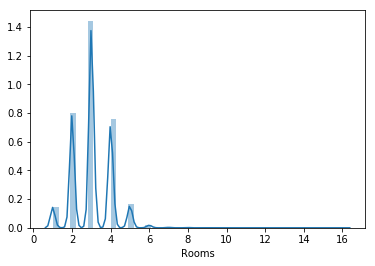

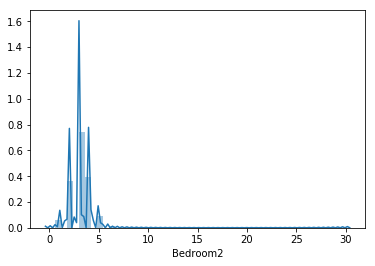

In [21]:
sns.distplot(df['Rooms'])
plt.show()
sns.distplot(df['Bedroom2'].dropna())
plt.show()

In [41]:
df.Bedroom2[df.Bedroom2 > 16].count()
       

2

Rooms and Bedroom2 have very similarly shaped data, with Bedroom2 having a longer right tail than Rooms, but it only has 2 outliers beyond the highest Rooms values. Bedroom 2 is also missing data in 25% of its rows. We'll drop Bedroom2

__Impute Missing Values__

In [21]:
#drop na's in the councilarea and regionname columns back to df
df.dropna(subset=['CouncilArea', 'Regionname'], inplace = True)

In [22]:
#preview data
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [80]:
#inspect regionname column
df['Regionname'].unique()

[Northern Metropolitan, Western Metropolitan, Southern Metropolitan, Eastern Metropolitan, South-Eastern Metropolitan, Eastern Victoria, Northern Victoria, Western Victoria]
Categories (8, object): [Northern Metropolitan, Western Metropolitan, Southern Metropolitan, Eastern Metropolitan, South-Eastern Metropolitan, Eastern Victoria, Northern Victoria, Western Victoria]

In [23]:
# replace numerical values with median 
df.fillna(df.median(), inplace=True)

# fill categorical null values with most frequent value
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [24]:
#from sklearn.preprocessing import Imputer
# replace numerical values with median 
#imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Train the imputor on the df dataset
#imp = imp.fit_transform(df)

# Apply the imputer to the df dataset
#imputed_df = imp.transform(df.values)

# View the data
#imputed_df

### Data Exploration

In [25]:
#describe outcome(Price) data
df['Price'].describe()

count    3.485400e+04
mean     1.010863e+06
std      5.720167e+05
min      8.500000e+04
25%      6.950000e+05
50%      8.700000e+05
75%      1.150000e+06
max      1.120000e+07
Name: Price, dtype: float64

In [26]:
# look at correlation between continous variables
df.corr()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.391627,0.271481,0.823836,0.481592,0.317120,0.031214,0.102948,-0.015314,0.002195,0.087086,-0.071677
Price,0.391627,1.000000,-0.181825,0.320101,0.278848,0.137143,0.027305,0.065187,-0.195415,-0.162171,0.141940,-0.052824
Distance,0.271481,-0.181825,1.000000,0.239958,0.102258,0.204177,0.048272,0.051005,0.220197,-0.089834,0.178568,-0.018140
Bedroom2,0.823836,0.320101,0.239958,1.000000,0.585423,0.375112,0.034713,0.112591,-0.004083,0.002951,0.104671,-0.046784
Bathroom,0.481592,0.278848,0.102258,0.585423,1.000000,0.322750,0.030378,0.103328,0.131287,-0.054440,0.108000,-0.021248
Car,0.317120,0.137143,0.204177,0.375112,0.322750,1.000000,0.033245,0.070827,0.098392,-0.007214,0.047814,-0.005165
Landsize,0.031214,0.027305,0.048272,0.034713,0.030378,0.033245,1.000000,0.084981,0.011090,0.022668,-0.002680,-0.014770
BuildingArea,0.102948,0.065187,0.051005,0.112591,0.103328,0.070827,0.084981,1.000000,0.011531,0.012990,-0.003736,-0.015732
YearBuilt,-0.015314,-0.195415,0.220197,-0.004083,0.131287,0.098392,0.011090,0.011531,1.000000,0.068722,-0.013363,0.015483
Lattitude,0.002195,-0.162171,-0.089834,0.002951,-0.054440,-0.007214,0.022668,0.012990,0.068722,1.000000,-0.345067,0.009892


In [27]:
# pull out variables with strong correlations to predicted variable (price)
correlated = df.loc[:, ['Price', 'Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'YearBuilt', 'Longtitude']]
correlated.corr()

,Price,Rooms,Distance,Bedroom2,Bathroom,Car,YearBuilt,Longtitude
Price,1.000000,0.391627,-0.181825,0.320101,0.278848,0.137143,-0.195415,0.141940
Rooms,0.391627,1.000000,0.271481,0.823836,0.481592,0.317120,-0.015314,0.087086
Distance,-0.181825,0.271481,1.000000,0.239958,0.102258,0.204177,0.220197,0.178568
Bedroom2,0.320101,0.823836,0.239958,1.000000,0.585423,0.375112,-0.004083,0.104671
Bathroom,0.278848,0.481592,0.102258,0.585423,1.000000,0.322750,0.131287,0.108000
Car,0.137143,0.317120,0.204177,0.375112,0.322750,1.000000,0.098392,0.047814
YearBuilt,-0.195415,-0.015314,0.220197,-0.004083,0.131287,0.098392,1.000000,-0.013363
Longtitude,0.141940,0.087086,0.178568,0.104671,0.108000,0.047814,-0.013363,1.000000


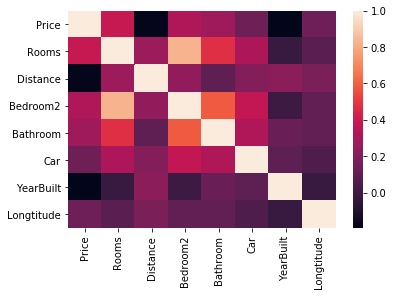

In [28]:
# visualize correlations of selected variables
sns.heatmap(correlated.corr())
plt.show()

In [29]:
# rooms and bedroom2 highly correlated.  Compare summary stats.
df[['Rooms', 'Bedroom2']].describe()

# Keep rooms, discard Bedroom2
continuous_features = df.loc[:, ['Price', 'Rooms', 'Distance', 'Bathroom', 'Car', 'YearBuilt', 'Longtitude']]

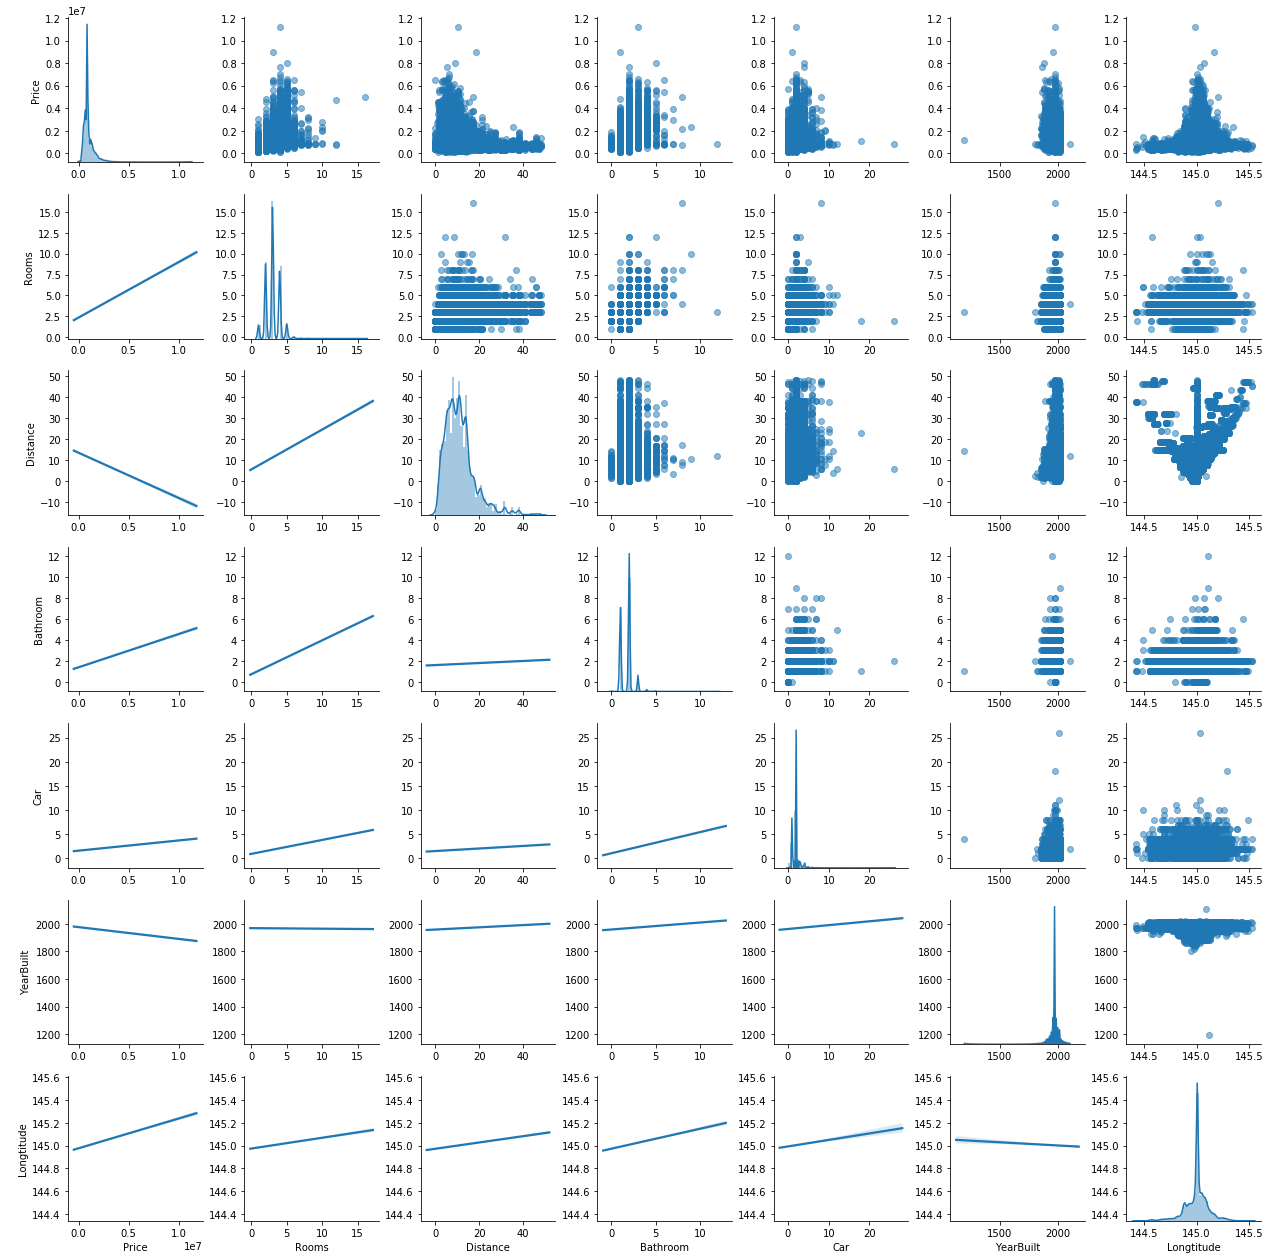

In [30]:
plt.figure(figsize=(10,8))

#Declare scatterplot matrix
g = sns.PairGrid(continuous_features, diag_sharey=False)

#Set upper matrix to scatter
g.map_upper(plt.scatter, alpha=.5)

#Set lower matrix to regression lines
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

#Set diagonals to distribution plot
g.map_diag(sns.distplot)
plt.show()

In [31]:
# Exclude all rows where column contains 1+ outlier(s) beyond 2 standard deviations. 
from scipy import stats
continuous_features = continuous_features[(np.abs(stats.zscore(continuous_features)) <= 2.0).all(axis=1)]

In [32]:
continuous_features.shape

(23745, 7)

In [33]:
# revisit correlation
continuous_features.corr()

,Price,Rooms,Distance,Bathroom,Car,YearBuilt,Longtitude
Price,1.000000,0.379675,-0.116560,0.166419,0.167226,-0.148943,0.191975
Rooms,0.379675,1.000000,0.295576,0.349395,0.276410,-0.042306,0.108807
Distance,-0.116560,0.295576,1.000000,0.082998,0.142310,0.055402,0.290355
Bathroom,0.166419,0.349395,0.082998,1.000000,0.348222,0.162171,0.123323
Car,0.167226,0.276410,0.142310,0.348222,1.000000,-0.060848,0.082950
YearBuilt,-0.148943,-0.042306,0.055402,0.162171,-0.060848,1.000000,-0.051886
Longtitude,0.191975,0.108807,0.290355,0.123323,0.082950,-0.051886,1.000000


In [34]:
# drop distance and longitude.  
continuous_features = continuous_features.drop(['Distance', 'Longtitude'], 1)

### Categorical Variable Exploration

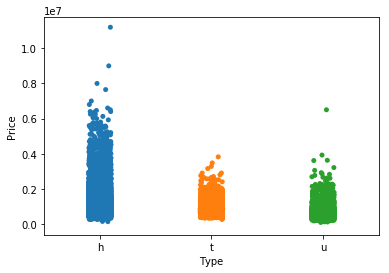

In [35]:
# Type of housing vs price
sns.stripplot(x=df['Type'], y=df['Price'], jitter=True)
plt.show()

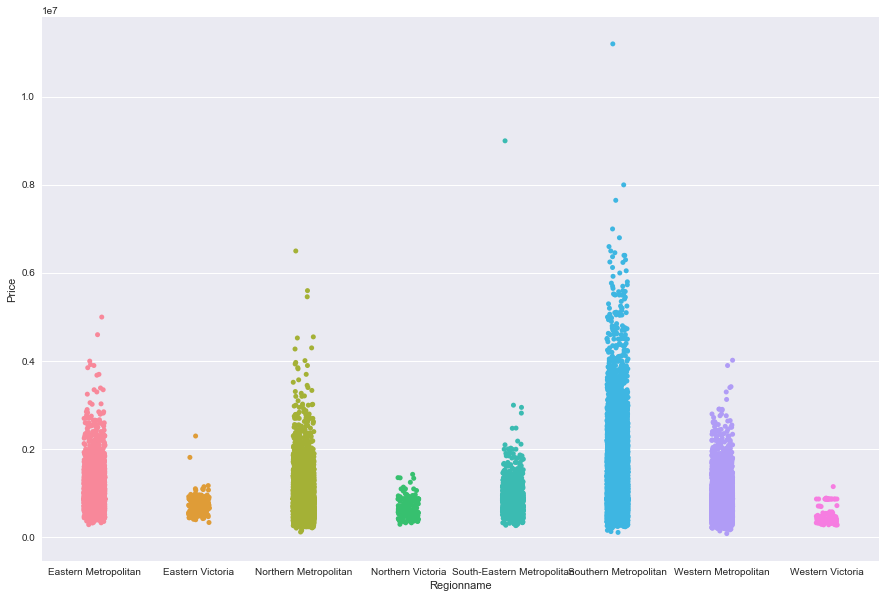

In [77]:
# Region name vs price
sns.stripplot(x=df['Regionname'], y=df['Price'], jitter=True)
sns.set(rc={'figure.figsize':(12,10)})
plt.show()

In [38]:
# select housing type and region name as features
categorical_features = df.loc[:, ['Type', 'Regionname']]

In [39]:
# create dummy variables for categoricl features
categorical_features = pd.get_dummies(data=categorical_features)

In [40]:
categorical_features.head()

,Type_h,Type_t,Type_u,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,1,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0


## Feature Engineering

### Model Data


In [41]:
# drop one dummy variable from each category
X_categorical = categorical_features.drop(columns=['Type_u', 'Regionname_Western Victoria'])

# drop target value from continuous features
X_continuous = continuous_features.drop('Price', 1)

# join X dataframes.  Join categorical to continuous to account for removed outlier data. 
X = X_continuous.join(X_categorical)

In [45]:
# define model inputs
y = continuous_features.loc[:, 'Price']
y.shape

(23745,)

In [46]:
print(X.shape)


(23745, 13)


## Model Data


*Linear Regression Models*
* Simple Ordinary Least Sqaures 
* LASSO 

Support Vector Regression 

*Random Forest Regression*
* With and without gradient boosting

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size = .3,
                                                  random_state=123)

__OLS__

In [48]:
# OLS 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

OLS = LinearRegression()
OLS.fit(X_train, y_train)
scores = cross_val_score(OLS, X_test, y_test, cv=10)
print(scores.mean())

0.31037356729


__LASSO__

Text(0,0.5,'MSE')

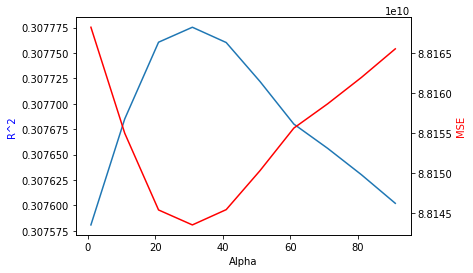

In [49]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
lasso = Lasso()

# Create holders for coefficients 
lasso_r_squared = []
lasso_errors = []

# Generate range of alpha values
alphas = np.arange(1, 100, 10)

# Train model with different regularization values
for a in alphas:
    lasso.set_params(alpha=a, fit_intercept=False)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    lasso_r_squared.append(lasso.score(X_test, y_test))
    lasso_errors.append(mean_squared_error(y_pred, y_test))

# Display results
plt.figure(figsize=(15,8))

fig, ax1 = plt.subplots()

ax1.plot(alphas, lasso_r_squared)
ax1.set_xlabel('Alpha')
ax1.set_ylabel('R^2', color='b')

ax2 = ax1.twinx()
ax2.plot(alphas, lasso_errors, color='r')
ax2.set_ylabel('MSE', color='r')

In [65]:
lasso = Lasso(alpha=30)
lasso.fit(X_train, y_train)
lasso_scores = cross_val_score(lasso, X_test, y_test, cv=5)
print(lasso_scores.mean())

0.311377915089


__SVR__

In [51]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
svr_scores = cross_val_score(svr, X_test, y_test, cv=5)
print(svr_scores)

#Why didn't this work very well?

[-0.03905919 -0.03063872 -0.0583324  -0.03833241 -0.02579517]


__Random Forest__

In [52]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(
        criterion='mse',
        max_depth=5)

forest.fit(X_train,y_train)
forest_scores = cross_val_score(forest, X_test, y_test, cv=5)
print(forest_scores)
print(forest_scores.mean())

[ 0.3548014   0.35363364  0.29354418  0.31719385  0.30990493]
0.325815599485


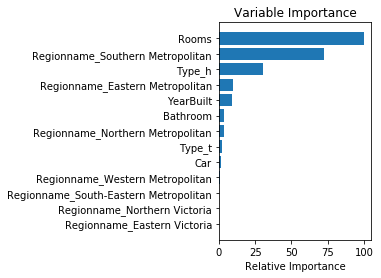

In [53]:
feature_importance = forest.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [54]:
# Random Forest w/ Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(
        loss='ls',
        n_estimators=100,
        max_depth=5, 
        subsample=0.5, 
)

gbr.fit(X_train,y_train)
gbr.score(X_test,y_test)

0.34973458495831722

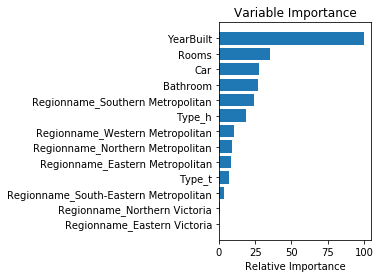

In [55]:
feature_importance = gbr.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Try standardizing all features

In [57]:
# standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                  test_size = .3,
                                                  random_state=123)

In [59]:
# retry OLS
OLS_scaled = LinearRegression()
OLS_scaled.fit(X_train, y_train)
scores = cross_val_score(OLS_scaled, X_scaled, Y, cv=10)
print(scores.mean())

0.299730728758


In [60]:
# Random Forest w/ Gradient Boosting
gbr_scaled = GradientBoostingRegressor(
        loss='ls',
        n_estimators=100,
        max_depth=5, 
        subsample=0.5, 
)

gbr_scaled.fit(X_train,y_train)
gbr_scaled.score(X_test,y_test)

0.35425090609064991

### Conclusions:

* Best performing model was Gradient Boosting Regressor with an accuracy of 35%
* Most important features for predicting price were: year built, number of rooms/bathrooms, housing type, and if the region was Southern Metro
* Scaling data did not improve model performance